In [108]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [109]:
# vamos dar uma olhada nos temas que podemos usar, para deixar nossos graficos mais bonitos
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [110]:
# para estudo vamos usar os dados que tenho no meu repositório. 
dados = pd.read_csv('https://raw.githubusercontent.com/lucasaraujo11/Machine-Learning-Credit-Scoring/refs/heads/main/dataset/base_dados_traduzida.csv')

In [111]:
dados.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [112]:
dados['tempo_emprego_atual'].unique()

array(['.. >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year '], dtype=object)

In [113]:
# apenas para criar nosso grafico, vamos analisar a quantidade de pessoas de por tempo de emprego no emprego atual
dados['tempo_emprego_atual'].value_counts().reset_index()

,tempo_emprego_atual,count
0,1 <= ... < 4 years,339
1,.. >= 7 years,253
2,4 <= ... < 7 years,174
3,... < 1 year,172
4,unemployed,62


In [ ]:
# *** TRATANDO RAPIDAMENTE NOSSOS DADOS ***

# os dados que vamos usar
dados_graf_01 = dados['tempo_emprego_atual'].value_counts().reset_index()

# vamos deixar nossos dados organizados por categoria 
dados_graf_01['tempo_emprego_atual'] = pd.Categorical(dados_graf_01['tempo_emprego_atual'], categories=['unemployed', '... < 1 year ', '1 <= ... < 4 years', '4 <= ... < 7 years','.. >= 7 years'], ordered = True)

# vamos organizar os valores pela categoria
dados_graf_01.sort_values(by='tempo_emprego_atual', inplace=True)

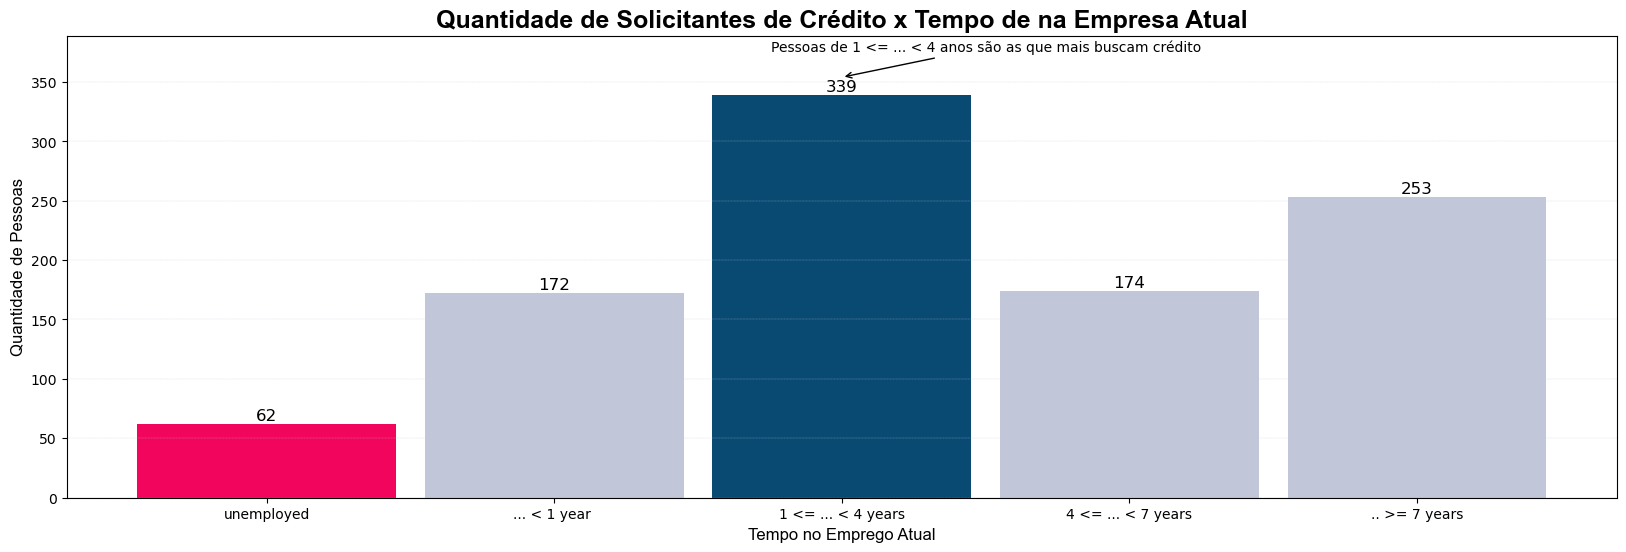

In [171]:
# vamos criar nosso grafico, vamos sempre usar funções para isso
def grafico_barras(dados, x, y):

    # vamos criar uma lista de cores que vamos usar em nossas barras
    cores = ['#094A73', '#F2055C', '#C1C7D9']

    # vamos buscar o maior e menor valor para darmos destaque me nosso grafico
    max_valor = dados[y].max()
    min_valor = dados[y].min()

    # para cada barra vamos dar uma cor, onde o maior valor recebe a primeira cor, o menor a segunda cor e o restante a terceira cor
    lista_cores = [cores[0] if valor == max_valor else cores[1] if valor == min_valor else cores[2] for valor in dados[y]]

    # vamos dar ao nosso grafico um estilo
    plt.style.use('default')

    # vamos criar nossa figura e dar uma tamanho para ela lagura e altura
    fig, ax = plt.subplots(figsize=(20, 6))

    # criando nosso grafico de barras passando x e y e as cores das barras
    ax.bar(dados[x], dados[y], color = lista_cores, width = 0.9)

    # vamos incluir um titulo e os nomes dos eixo. vamos mudar o tamanho da fonte, deixar negrito e titulo e colocar uma fonte.
    ax.set_title('Quantidade de Solicitantes de Crédito x Tempo de na Empresa Atual', fontsize=18, fontweight='bold', fontname='Arial')
    ax.set_xlabel('Tempo no Emprego Atual', fontsize=12, fontname='Arial')
    ax.set_ylabel('Quantidade de Pessoas', fontsize=12, fontname='Arial')

    ax.set_ylim(0, max_valor + 50)

    # vamos criar as linhas de grade
    ax.grid(True, axis = 'y', linestyle = '--', linewidth=0.2, color=cores[2]) 

    # vamos incluir os valores no grafico, para ficar mais informativo. vamos deixar no centro e mudar a fonte
    for date, value in zip(dados[x], dados[y]):
        ax.text(date, value + (max(dados[y]) * 0.01), f'{value:.0f}', ha='center', fontsize=12)
    
    # vamos incluir uma seta e incluir um texto para darmos um destaque
    ax.annotate('Pessoas de 1 <= ... < 4 anos são as que mais buscam crédito', xy=('1 <= ... < 4 years', max_valor + 15), xytext=(2.5, max_valor + 40), arrowprops=dict(arrowstyle="->"), horizontalalignment='center', verticalalignment='center')

    # apresenta o grafico
    plt.show()

# *** PLOTANTO O GRAFICO ***
# executando nosso grafico passando os parametros necessarios 
grafico_barras(dados_graf_01, x = 'tempo_emprego_atual', y = 'count')